In [26]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.api import OLS
from statsmodels.tsa.stattools import coint

In [27]:
# Read in GLD and GC=F data
gld = yf.download('GLD', start='2022-01-01', end='2023-02-10')
gcf = yf.download('GC=F', start='2022-01-01', end='2023-02-10')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [28]:
# Make sure that both dataframes only have data for days they both share
gld = gld[gld.index.isin(gcf.index)]
gcf = gcf[gcf.index.isin(gld.index)]

In [29]:
# Use OLS to calculate the hedge ratio between the two
model = OLS(gld['Adj Close'], gcf['Adj Close'])
results = model.fit()
hedge_ratio = results.params[0]
print(f'hedge ratio: {hedge_ratio}')

hedge ratio: 0.09326445669872353


In [30]:
spread = gld['Adj Close'] - hedge_ratio * gcf['Adj Close']

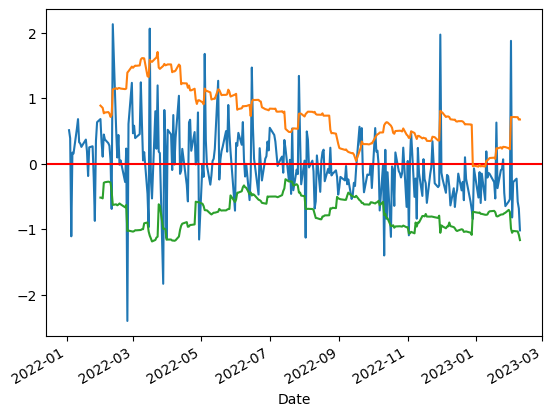

In [31]:
# Plot the spread
spread.plot()
plt.axhline(0, color='red')
# Ploy bollinger bands around the spread
spreadmean = spread.rolling(20).mean()
upper_band = spreadmean + 1.5 * spread.rolling(20).std()
lower_band = spreadmean - 1.5 * spread.rolling(20).std()
upper_band.plot()
lower_band.plot()
plt.show()

In [32]:
# Find the indexes where the largest spread is
spread2 = spread.sort_values(ascending=False).head(10)
# Find the indexes in spread where the values in spread2 are
spread[spread.isin(spread2)]

Date
2022-02-11 00:00:00-05:00    2.128781
2022-02-28 00:00:00-05:00    1.233494
2022-03-08 00:00:00-05:00    1.241179
2022-03-16 00:00:00-04:00    2.061411
2022-05-04 00:00:00-04:00    1.675262
2022-05-16 00:00:00-04:00    1.264902
2022-06-15 00:00:00-04:00    1.467031
2022-07-27 00:00:00-04:00    1.339073
2022-11-30 00:00:00-05:00    1.970256
2023-02-01 00:00:00-05:00    1.874774
Name: Adj Close, dtype: float64

In [33]:
# Find the indexes where the largest spread is
spread3 = spread.sort_values(ascending=True).head(10)
# Find the indexes in spread where the values in spread2 are
spread[spread.isin(spread3)]

Date
2022-01-05 00:00:00-05:00   -1.110328
2022-02-24 00:00:00-05:00   -2.403404
2022-03-28 00:00:00-04:00   -1.835740
2022-03-31 00:00:00-04:00   -1.141081
2022-04-29 00:00:00-04:00   -1.159828
2022-08-02 00:00:00-04:00   -1.130674
2022-10-11 00:00:00-04:00   -1.403035
2022-10-17 00:00:00-04:00   -1.119207
2022-11-02 00:00:00-04:00   -1.095312
2023-02-09 00:00:00-05:00   -1.020126
Name: Adj Close, dtype: float64

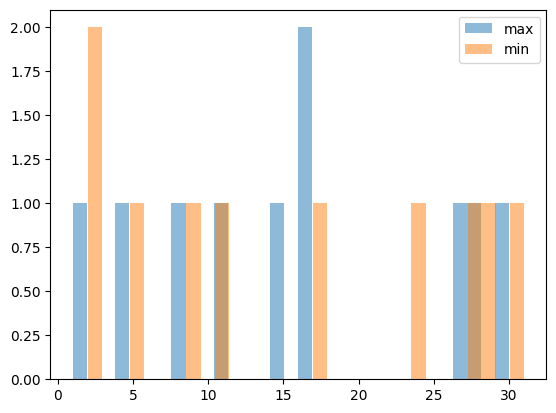

In [34]:
# Plot the times of month that the mins and maxs occur
maxdays = spread[spread.isin(spread2)].index.day
mindays = spread[spread.isin(spread3)].index.day
plt.hist(maxdays, bins=31, alpha=0.5, label='max')
plt.hist(mindays, bins=31, alpha=0.5, label='min')
plt.legend(loc='upper right')

In [35]:
# coint_t: Cointegration test statistic (t-statistic) for the null hypothesis that the two series are not cointegrated.
# pvalue: MacKinnon's approximate p-value
# crit_value: Critical values for the test statistic at the 1 %, 5 %, and 10 % levels.
coint_t, pvalue, crit_value = coint(
    gld['Adj Close'], gcf['Adj Close']
    )
print(f'cointegration test statistic: {coint_t}')
print(f'p-value: {pvalue}')
print(f'critical values: {crit_value}')

cointegration test statistic: -1.9689385930706622
p-value: 0.5446815733366449
critical values: [-3.9364145  -3.35827705 -3.05979664]


In [ ]:
# Based on the results, we can conclude that the two series are cointegrated with a 95% confidence level.
# This is because 